<a href="https://colab.research.google.com/github/davidromeropro/sales-predictions/blob/main/Predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Predicciones de ventas**
## Creado por: David Romero

* Fecha creado: 17/02/2023
* Fecha de actualización: 26/03/2023
* Descripción: Predicciones de ventas alimenticias.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
filename = r'/home/dev/Developer/gdrive/CodingDojo/Week1/Assignments/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
print('Valores faltantes en Item_Weight:\n', df['Item_Weight'].isna().sum())
print('Muestra de valores en Item_Weight:\n', df['Item_Weight'].value_counts().head(5))

print('Valores faltantes en Outlet_Size:\n', df['Outlet_Size'].isna().sum())
print('Muestra de valores en Outlet_Size:\n', df['Outlet_Size'].value_counts().head(5))

Valores faltantes en Item_Weight:
 1463
Muestra de valores en Item_Weight:
 12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: Item_Weight, dtype: int64
Valores faltantes en Outlet_Size:
 2410
Muestra de valores en Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


* No se va a eliminar los registros con valores faltantes.
* Se va a definir un valor por defecto para los valores faltantes:
	* Para Item_Weight se va a definir con -1
	* Para Outlet_Size se va a definir con undefined

In [ ]:
df['Item_Weight'].fillna(-1, inplace=True)
df['Outlet_Size'].fillna('undefined', inplace=True)

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
variables = ['Item_Weight','Outlet_Size']
df[variables].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
# Muestra de valores de columnas categoricas.
for column in df.select_dtypes(['object']).columns:
	print(column)
	print(df[column].value_counts().head(10))
	print('*'* 100)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64
****************************************************************************************************
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
****************************************************************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: Item_Type, dtype: int64
****************************************************************************************************
Outlet_Identifier
OUT027    935
OUT013    932
OUT04

In [ ]:
# Se estandariza valores para Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [ ]:
# Columnas con datos númericos 
df.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

#### Item MRP 

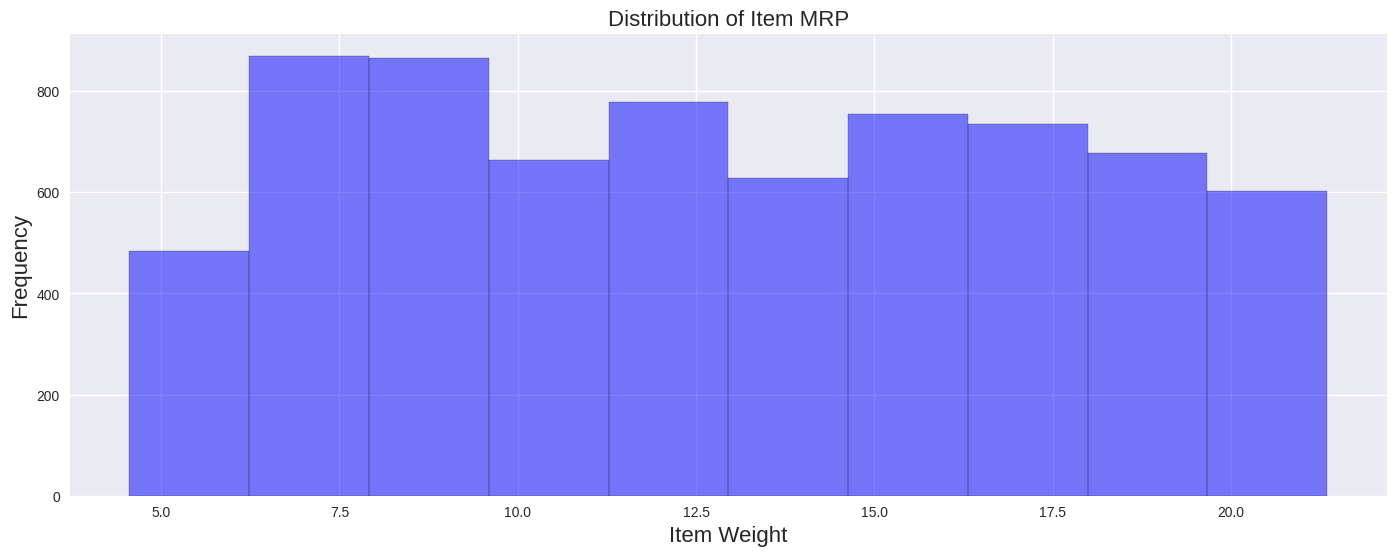

In [ ]:
# Se filtra los registros que si tienen valores en Item Weight
item_weight = df.loc[df['Item_Weight'] > 0,'Item_Weight']

plt.figure(figsize=(17,6))
plt.style.use("seaborn");
plt.hist(item_weight, alpha=.5,color='blue',edgecolor='black',bins=10);
plt.ylabel('Frequency', fontsize = 16);
plt.xlabel('Item Weight', fontsize = 16);
plt.title('Distribution of Item MRP', fontsize=16);


* El peso de los items tiene una distribución casi uniforme para los items que si tienen valores en esta característica. 

#### Item Visibility

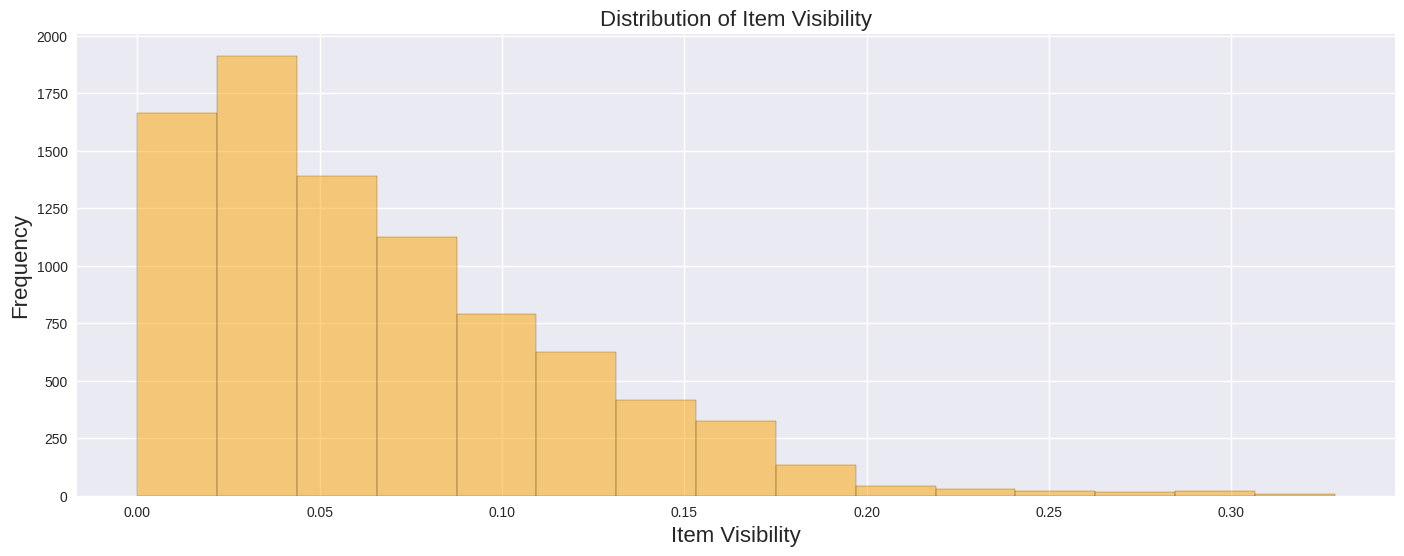

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(df['Item_Visibility'], alpha=0.5,color='orange',edgecolor='black',bins=15);
plt.ylabel('Frequency',fontsize=16);
plt.xlabel('Item Visibility',fontsize=16);
plt.title('Distribution of Item Visibility', fontsize=16);

* La visibilidad de los items tiene una distribución sesgada a la derecha, es decir entre menor es la visibilidad de un item mayor es su número.  

### Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

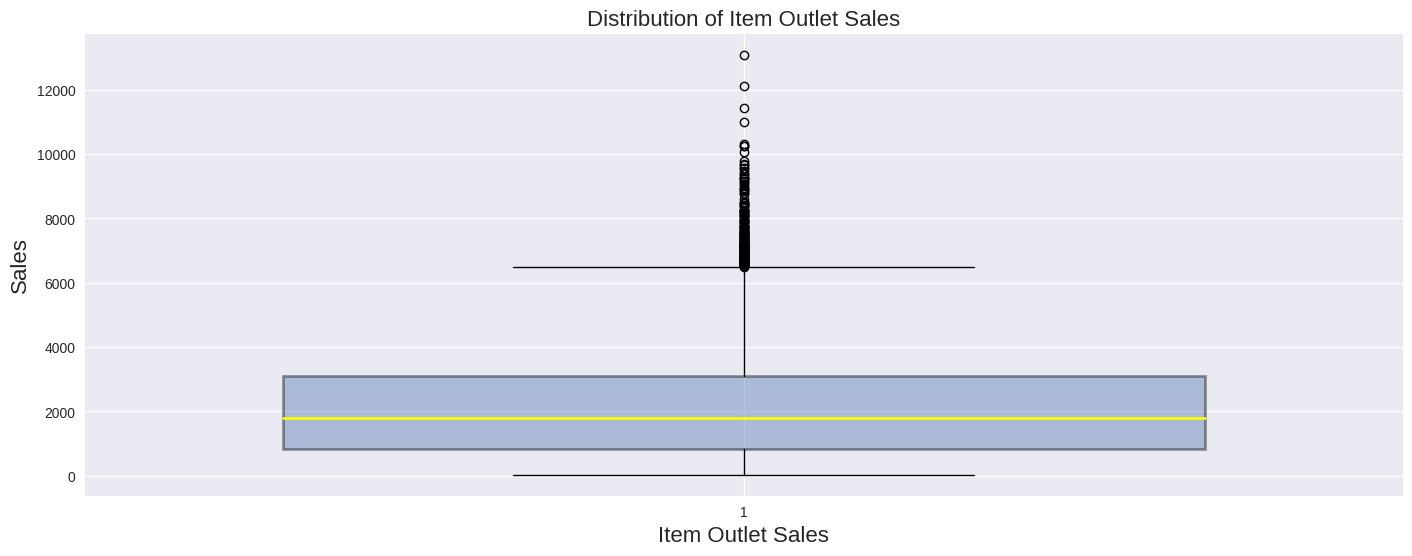

In [ ]:
plt.figure(figsize=(17,6))
item_outlet_sale = df['Item_Outlet_Sales']
boxplots = plt.boxplot([item_outlet_sale],
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict( linewidth=2, color='Black', alpha = .4));
plt.ylabel('Sales',fontsize=16);
plt.xlabel('Item Outlet Sales',fontsize=16);
plt.title('Distribution of Item Outlet Sales', fontsize=16);

In [ ]:
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].median()

1794.331

* Si bien la escala para las ventas de items dificulta determinar el valor mínimo de 33.29, el valor de la mediana (color amarillo) de 1794.331, se puede observar que existen varios valores atípicos que estan fuera del patrón de distribución y que corresponden a valores altos de ventas. 

### Mapa de calor de la correlación entre las características.

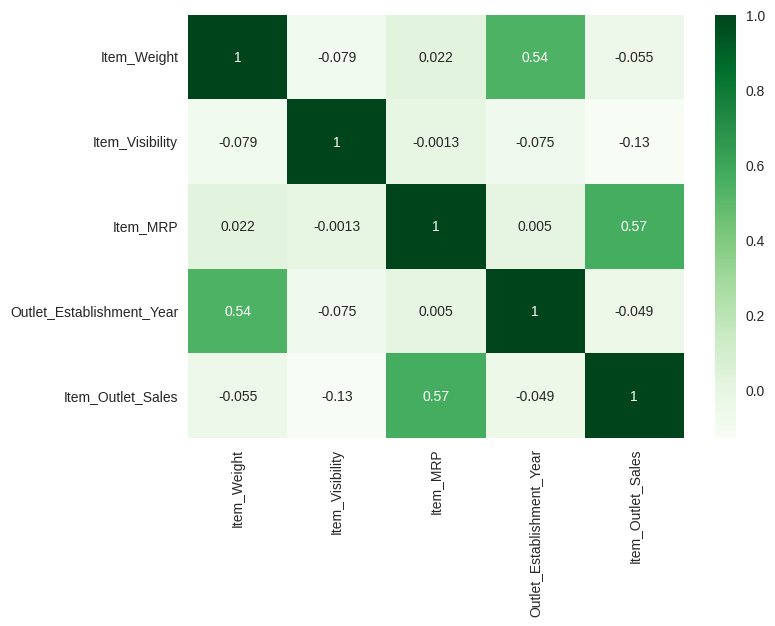

In [ ]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Hay una correlación moderada entre el precio de venta de un item con las ventas del mismo.

* Crear un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).


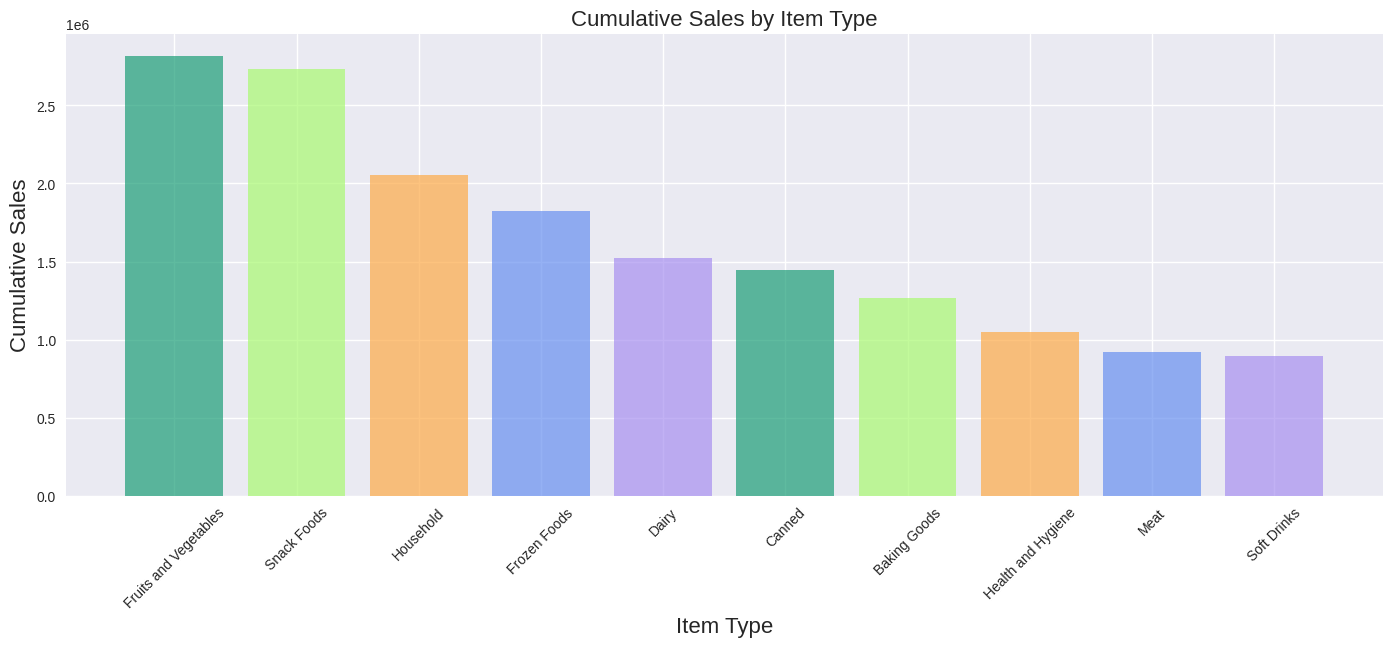

In [ ]:
plt.figure(figsize=(17,6));
items_top_sales = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().nlargest(n=10,keep='all').reset_index()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
plt.bar(items_top_sales['Item_Type'],items_top_sales['Item_Outlet_Sales'],alpha=.7,color=colors);
plt.ylabel('Cumulative Sales',fontsize=16);
plt.xlabel('Item Type',fontsize=16);
plt.title('Cumulative Sales by Item Type', fontsize=16);
plt.xticks(rotation=45);

* La categoría de items que mas ingresos genera son las frutas y los vegetales.

In [ ]:
max_item_visibility = df[df['Item_Type'].isin(items_top_sales['Item_Type'])].groupby(['Item_Type'])['Item_Visibility'].max().sort_values(ascending=False).reset_index()

In [ ]:
top_item_type = pd.merge(items_top_sales,max_item_visibility)
top_item_type

,Item_Type,Item_Outlet_Sales,Item_Visibility
0,Fruits and Vegetables,2.820060e+06,0.321115
1,Snack Foods,2.732786e+06,0.303743
2,Household,2.055494e+06,0.325781
3,Frozen Foods,1.825735e+06,0.294939
4,Dairy,1.522594e+06,0.304737
5,Canned,1.444151e+06,0.328391
6,Baking Goods,1.265525e+06,0.311090
7,Health and Hygiene,1.045200e+06,0.255348
8,Meat,9.175656e+05,0.287017
9,Soft Drinks,8.928977e+05,0.306543


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

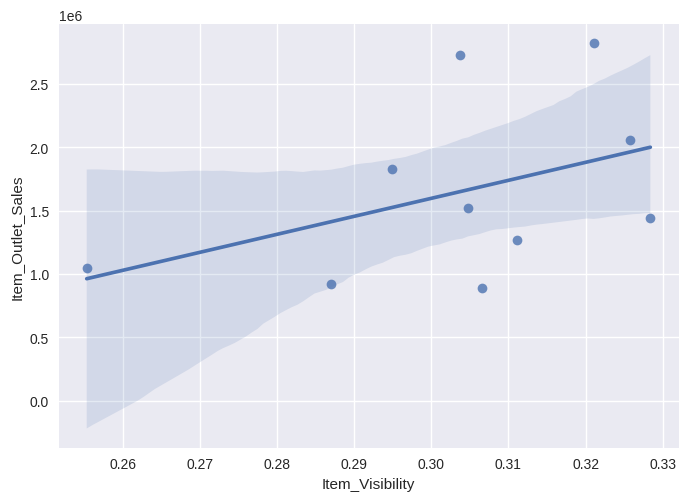

In [ ]:
sns.regplot(x=top_item_type['Item_Visibility'], y=top_item_type['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

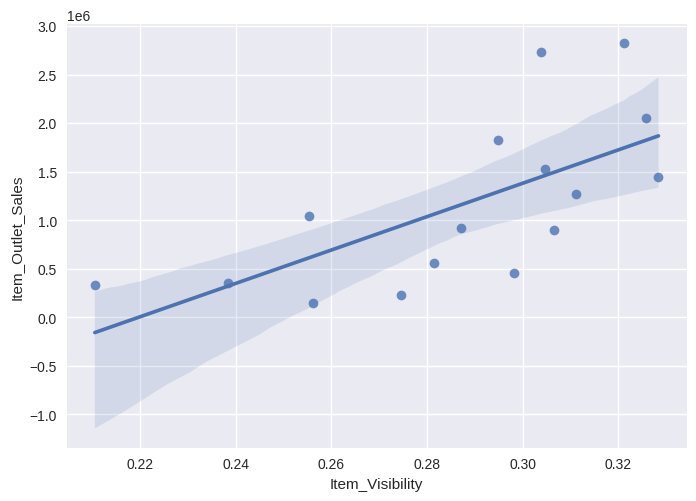

In [ ]:
cum_sales = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index()
max_visibility = df.groupby(['Item_Type'])['Item_Visibility'].max().reset_index()
total = pd.merge(cum_sales,max_visibility)

sns.regplot(x=total['Item_Visibility'], y=total['Item_Outlet_Sales'])

In [ ]:
df.groupby(['Item_Type'])['Item_Visibility'].max().sort_values(ascending=False)

Item_Type
Canned                   0.328391
Household                0.325781
Fruits and Vegetables    0.321115
Baking Goods             0.311090
Soft Drinks              0.306543
Dairy                    0.304737
Snack Foods              0.303743
Hard Drinks              0.298205
Frozen Foods             0.294939
Meat                     0.287017
Breads                   0.281510
Breakfast                0.274592
Seafood                  0.256152
Health and Hygiene       0.255348
Starchy Foods            0.238366
Others                   0.210596
Name: Item_Visibility, dtype: float64

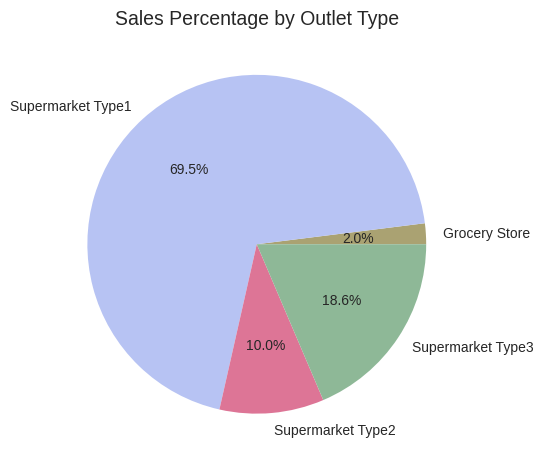

In [ ]:
outlet_sales = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()
colors = ['#AAA272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(outlet_sales['Item_Outlet_Sales'],labels=outlet_sales['Outlet_Type'],autopct='%1.1f%%',colors=colors);
plt.title('Sales Percentage by Outlet Type', fontsize=14);
plt.xticks(rotation=45);

* El mayor porcentaje de ventas acumuladas corresponde a outlet de tipo Supermarket Type 1.

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Pipeline, ColumnTransformer y SimpleImputer

Regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
filename = r'/home/dev/Developer/gdrive/CodingDojo/Week1/Assignments/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Se estandariza valores para Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Missing values
df.isna().sum().nlargest(n=3)

Outlet_Size        2410
Item_Weight        1463
Item_Identifier       0
dtype: int64

In [ ]:
# Unique values of Outlet_Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
percentage_missing_values_outlet_size = (100*df['Outlet_Size'].isna().sum()/df['Outlet_Size'].shape[0]).round(2)
print(f'percentage of missing values in Outlet_Size: {percentage_missing_values_outlet_size}')
percentage_missing_values_item_weight = (100*df['Item_Weight'].isna().sum()/df['Item_Weight'].shape[0]).round(2)
print(f'percentage of missing values in Item_Weight: {percentage_missing_values_item_weight}')
percentage_missing_values_outlet_size_or_item_weight = (100*(df[df['Outlet_Size'].isna() | df['Item_Weight'].isna()].shape[0])/df['Item_Weight'].shape[0])
print(f'percentage of missing values in Outlet_Size or Item_Weight: {round(percentage_missing_values_outlet_size_or_item_weight,2)}')

percentage of missing values in Outlet_Size: 28.28
percentage of missing values in Item_Weight: 17.17
percentage of missing values in Outlet_Size or Item_Weight: 45.44


In [ ]:
# Se remueven columnas que se considera que no aportan a la predicción
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

1. Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

2. Realicen un train test split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

3. Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
# cons_imputer = SimpleImputer(strategy='constant',fill_value='undefined')
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43e5515f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43de6f59a0>)])

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43e5515f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43de6f59a0>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('shape of data is', X_train_processed.shape)
X_train_processed

0 missing values in training data
0 missing values in testing data
All data in X_train_processed are float64
All data in X_test_processed are float64
shape of data is (6392, 32)


array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
cat_names = preprocessor.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names_out()
num_names = df[num_selector].columns[:-1]
labels_aux = np.concatenate([num_names, cat_names])
labels = list(map(lambda label: label.replace(' ' , '_'),labels_aux))

In [ ]:
X_train_df = pd.DataFrame(X_train_processed,columns=labels)
X_train_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,x0_Low_Fat,x0_Regular,x1_Baking_Goods,x1_Breads,x1_Breakfast,x1_Canned,...,x2_High,x2_Medium,x2_Small,x3_Tier_1,x3_Tier_2,x3_Tier_3,x4_Grocery_Store,x4_Supermarket_Type1,x4_Supermarket_Type2,x4_Supermarket_Type3
0,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.017021,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Linear Regression

1) La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

* Creen un modelo de regresión lineal.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [ ]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

* Evalúen el rendimiento del modelo basándose en r^2.

In [ ]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(f'r2 train: {r2_train.round(3)}')
print(f're test: {r2_test.round(3)}')
print(f'La diferencia entre r2 train y r2 test: {(r2_train-r2_test).round(2)}')

r2 train: 0.561
re test: 0.567
La diferencia entre r2 train y r2 test: -0.01


El valor de 0,56 en R2 significa que el 56 % de la varianza de la variable dependiente se explica por las variables independientes. Esto indica una relación de moderada entre las variables, pero también significa que todavía hay un 44 % de la varianza en la variable dependiente que no se explica por las variables independientes.

* Evalúen el rendimiento del modelo basándose en RECM.

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'rmse train: {rmse_train.round(3)}')
print(f'rmse test: {rmse_test.round(3)}')
print(f'La diferencia entre rmse train y rmse test: {(rmse_train-rmse_test).round(2)}')

rmse train: 1139.575
rmse test: 1092.93
La diferencia entre rmse train y rmse test: 46.65


El RMS de entrenamiento es de $1139, significa que, en promedio, las predicciones del modelo tienen un error de $1139, un valor bastante alto.

# Regression Tree

2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

* Creen un modelo simple de árbol de regresión.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

* Comparen el rendimiento del modelo basándose en r^2.

In [ ]:
dec_tree.get_depth()

40

In [ ]:
# Obtengan las predicciones del conjunto de entrenamiento
dec_train_preds = dec_tree.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
dec_test_preds = dec_tree.predict(X_test_processed)

In [ ]:
r2_train = r2_score(y_train, dec_train_preds)
r2_test = r2_score(y_test, dec_test_preds)
print(f'r2 train: {r2_train.round(3)}')
print(f're test: {r2_test.round(3)}')
print(f'La diferencia entre r2 train y r2 test: {(r2_train-r2_test).round(2)}')

r2 train: 1.0
re test: 0.181
La diferencia entre r2 train y r2 test: 0.82


In [ ]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 40))  # will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
tests = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth=depth,
                                     random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    result = {'depth': depth,'train_score': train_score, 'test_score': test_score}
    tests.append(result)

tests_df = pd.DataFrame(tests, columns = ['depth','train_score','test_score'])

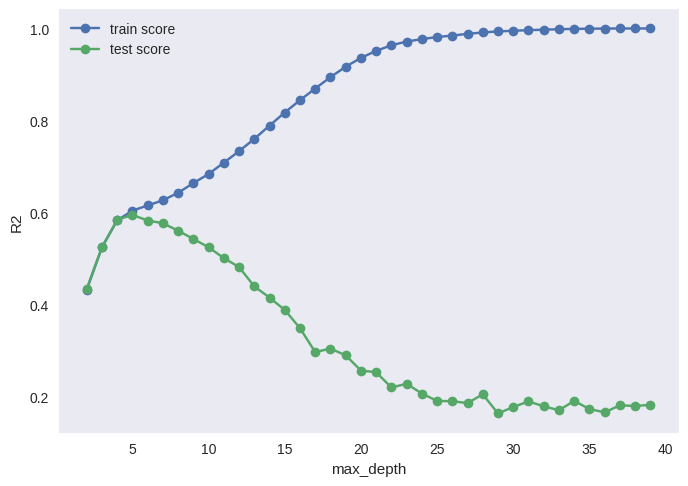

In [ ]:
plt.plot(tests_df['depth'], tests_df['train_score'], marker='o')
plt.plot(tests_df['depth'], tests_df['test_score'], marker='o')
plt.grid()
plt.xlabel('max_depth')
plt.legend(['train score','test score'])
plt.ylabel('R2');

In [ ]:
tests_df.loc[tests_df['test_score'].idxmax()]

depth          5.00000
train_score    0.60394
test_score     0.59471
Name: 3, dtype: float64

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth=5, random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# Obtengan las predicciones del conjunto de entrenamiento
dec_train_preds = dec_tree.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
dec_test_preds = dec_tree.predict(X_test_processed)

In [ ]:
r2_train = r2_score(y_train, dec_train_preds)
r2_test = r2_score(y_test, dec_test_preds)
print(f'r2 train: {r2_train.round(3)}')
print(f're test: {r2_test.round(3)}')
print(f'La diferencia entre r2 train y r2 test: {(r2_train-r2_test).round(2)}')

r2 train: 0.604
re test: 0.595
La diferencia entre r2 train y r2 test: 0.01


El valor de 0,60 en R2 significa que el 60 % de la varianza de la variable dependiente se explica por las variables independientes. Esto indica una relación de moderada entre las variables, pero también significa que todavía hay un 40 % de la varianza en la variable dependiente que no se explica por las variables independientes.

* Comparen el rendimiento del modelo basándose en RECM.

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, dec_train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, dec_test_preds))
print(f'rmse train: {rmse_train.round(3)}')
print(f'rmse test: {rmse_test.round(3)}')
print(f'La diferencia entre rmse train y rmse test: {(rmse_train-rmse_test).round(2)}')

rmse train: 1082.646
rmse test: 1057.443
La diferencia entre rmse train y rmse test: 25.2


El RMS de entrenamiento es de $1057, significa que, en promedio, las predicciones del modelo tienen un error de $1139, un valor bastante alto.

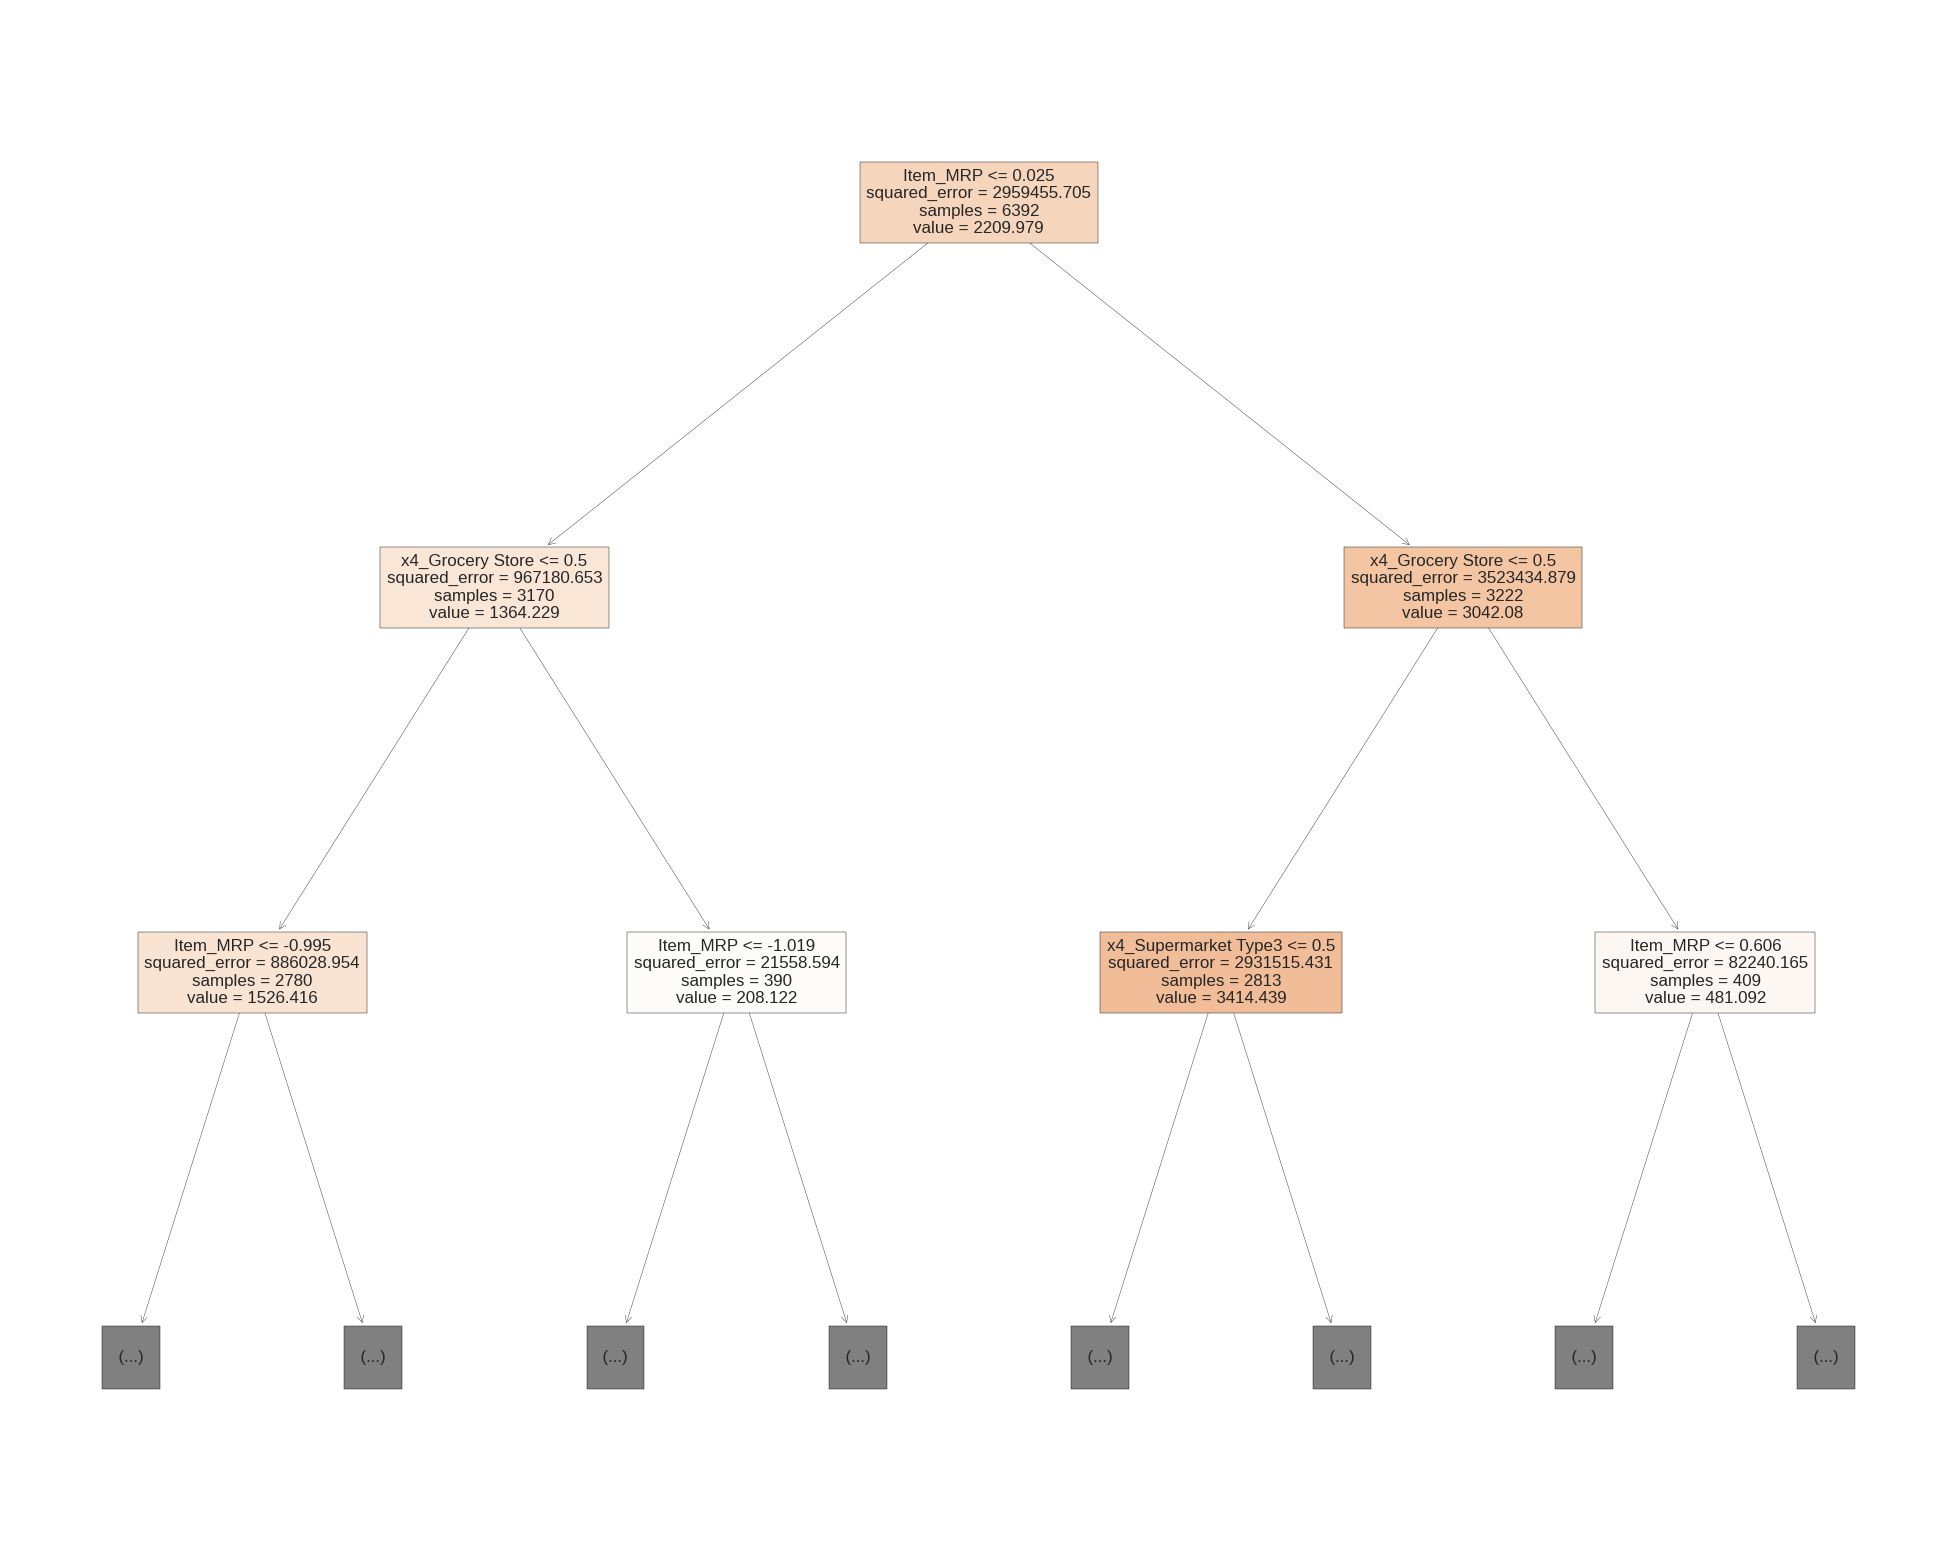

In [ ]:
fig = plt.figure(figsize=(25,20));
_ = tree.plot_tree(dec_tree, 
                   feature_names=labels,  
                   class_names=df.columns[-1],
				   max_depth=2,
                   filled=True)

3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.



In [ ]:
import statsmodels.formula.api as smf

In [ ]:
all_columns = "+".join(X_train_df.columns)
data = X_train_df.copy()
data['Item_Outlet_Sales']= y_train
lm = smf.ols(formula=("Item_Outlet_Sales~"+all_columns),data=data).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8108
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.742
Time:                        21:28:14   Log-Likelihood:                -42418.
No. Observations:                4787   AIC:                         8.489e+04
Df Residuals:                    4759   BIC:                         8.507e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1019.0935    104.880      9.717      0.000     813.480    1224.707
Item_Weight                  -7.0965     24.849     -0.286      0.775     -55.812      41.619
Item_Visibility              56.1920     25.715      2.185      0.029       5.779     106.605
Item_MRP                    -38.6030     25.032     -1.542      0.123     -87.677      10.471
Outlet_Establishment_Year   180.3526    176.642      1.021      0.307    -165.948     526.653
x0_Low_Fat                  535.0652     58.980      9.072      0.000     419.436     650.694
x0_Regular                  484.0283     60.488      8.002      0.000     365.444     602.612
x1_Baking_Goods              78.1493     91.211      0.857      0.392    -100.666     256.965
x1_Breads                   -25.6990    144.148     -0.178      0.859    -308.295     256.897
x1_Breakfast                281.0317    214.762      1.309      0.191    -140.001     702.064
x1_Canned                   -52.4283     92.338     -0.568      0.570    -233.453     128.597
x1_Dairy                     86.3443     89.787      0.962      0.336     -89.679     262.368
x1_Frozen_Foods              90.4167     81.405      1.111      0.267     -69.176     250.009
x1_Fruits_and_Vegetables     21.1711     70.249      0.301      0.763    -116.549     158.891
x1_Hard_Drinks              123.6057    149.905      0.825      0.410    -170.277     417.488
x1_Health_and_Hygiene        10.1550    102.501      0.099      0.921    -190.795     211.105
x1_Household                 92.7266     81.673      1.135      0.256     -67.391     252.844
x1_Meat                      -6.1798    113.453     -0.054      0.957    -228.601     216.241
x1_Others                   253.0066    165.387      1.530      0.126     -71.228     577.241
x1_Seafood                 -250.7672    266.247     -0.942      0.346    -772.735     271.201
x1_Snack_Foods               92.2107     70.859      1.301      0.193     -46.706     231.128
x1_Soft_Drinks               76.9575    107.958      0.713      0.476    -134.690     288.605
x1_Starchy_Foods            148.3926    170.340      0.871      0.384    -185.552     482.338
x2_High                     807.8147    376.419      2.146      0.032      69.860    1545.769
x2_Medium                   119.2402    147.738      0.807      0.420    -170.395     408.875
x2_Small                     92.0386    135.601      0.679      0.497    -173.802     357.879
x3_Tier_1                   480.5955    172.676      2.783      0.005     142.071     819.120
x3_Tier_2                   365.7894     83.495      4.381      0.000     202.101     529.478
x3_Tier_3                   172.7085    129.053      1.338      0.181     -80.296     425.713
x4_Grocery_Store            264.4242    101.580      2.603      0.009      

In [ ]:
lm = smf.ols(formula=("Item_Outlet_Sales~Item_Visibility+Item_MRP"),data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.362
Date:                Sun, 26 Mar 2023   Prob (F-statistic):             0.0347
Time:                        21:39:16   Log-Likelihood:                -42425.
No. Observations:                4787   AIC:                         8.486e+04
Df Residuals:                    4784   BIC:                         8.488e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2212.6578     24.709     89.547      0.000    2164.216    2261.100
Item_Visibility    50.6299     24.396      2.075      0.038       2.803      98.457
Item_MRP          -38.4087     24.790     -1.549      0.121     -87.009      10.191
==============================================================================
Omnibus:                      819.038   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.547
Skew:                           1.125   Prob(JB):                    6.08e-301
Kurtosis:                       4.366   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En general, ¿qué modelo recomiendan?

Recomiendo el modelo de regression tree.

Justifiquen su recomendación.


Tanto la regresión lineal como el árbol de regresión arrojan un valor de R2 cercano al 0.60. Este resultado indica que solo el 60% de la varianza de la variable dependiente puede explicarse por las variables independientes, lo que significa que el 40% restante no puede explicarse por ellas. La regresión lineal supone una relación lineal entre la variable dependiente y las independientes, la visibilidad y el precio de los productos se puede considerar que tienen una relación lineal con las ventas. Sin embargo, estas variables por sí solas no pueden explicar completamente las ventas, ya que existen otros factores complejos que también influyen, como el tipo de producto y otros adicionales que no estan considerados en la datos como por ejemplo la cercanía de las tiendas a los usuarios. No se puede asumir una relación lineal para todos los factores, por lo que es más apropiado utilizar un modelo de árbol de regresión que no supone una relación lineal entre la variable dependiente y las independientes y que permite considerar otros factores que puedan influir en las ventas.